은행 고객 이탈 데이터 EDA

In [37]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [38]:
# 불필요한 경고문 생략(선택)
import warnings
warnings.filterwarnings('ignore')

# 모든 컬럼 출력설정(선택)
pd.set_option('display.max_columns', None)

# 데이터 로드
data = pd.read_csv('train.csv')

# 데이터셋 확인

In [39]:
#데이터 확인 
print('[행/컬럼 갯수]')
print(f"행: {data.shape[0]}, 컬럼: {data.shape[1]}\n")
data.info()

[행/컬럼 갯수]
행: 165034, 컬럼: 14

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [40]:
#기초통계 확인 -수치형
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,165034.0,NaN,NaN,NaN,82516.5,47641.3565,0.0,41258.25,82516.5,123774.75,165033.0
CustomerId,165034.0,NaN,NaN,NaN,15692005.019026,71397.816791,15565701.0,15633141.0,15690169.0,15756824.0,15815690.0
Surname,165034,2797,Hsia,2456,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,165034.0,NaN,NaN,NaN,656.454373,80.10334,350.0,597.0,659.0,710.0,850.0
Geography,165034,3,France,94215,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,165034,2,Male,93150,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,165034.0,NaN,NaN,NaN,38.125888,8.867205,18.0,32.0,37.0,42.0,92.0
Tenure,165034.0,NaN,NaN,NaN,5.020353,2.806159,0.0,3.0,5.0,7.0,10.0
Balance,165034.0,NaN,NaN,NaN,55478.086689,62817.663278,0.0,0.0,0.0,119939.5175,250898.09
NumOfProducts,165034.0,NaN,NaN,NaN,1.554455,0.547154,1.0,1.0,2.0,2.0,4.0


In [41]:
#데이터 구조 확인
data.head(3)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.0,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.0,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.0,2,1.0,0.0,184866.69,0


# 결측치 확인

In [42]:
#결측값 확인 : 결측치 없음 
data.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# 중복값 확인

In [43]:
#전체 중복값 없음 ; 고객 총 165034명, 
con = data.duplicated(keep='first')# 모든 중복값 불러오는 옵션 keep=False
data[con]

#고객id 고유값 확인 =>  customerId 고유값은 23221개 (14%)
display(data.nunique())

#고객id 중복 값 : 141813개 86% 너무 겹침 
data['CustomerId'].duplicated().sum()


id                 165034
CustomerId          23221
Surname              2797
CreditScore           457
Geography               3
Gender                  2
Age                    71
Tenure                 11
Balance             30075
NumOfProducts           4
HasCrCard               2
IsActiveMember          2
EstimatedSalary     55298
Exited                  2
dtype: int64

141813

In [44]:
#동일한 CUSTOMERID 공통점 확인 => 공통된 특징 안보임
data.groupby('CustomerId').agg(list).head(3)

,id,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,,,
15565701,"[87277, 140882, 160702]","[Bruno, Chineze, Ferri]","[846, 705, 698]","[Spain, France, France]","[Male, Male, Female]","[49.0, 32.0, 39.0]","[8, 6, 2]","[0.0, 107209.58, 161993.89]","[2, 1, 1]","[1.0, 1.0, 1.0]","[1.0, 1.0, 0.0]","[90280.7, 129822.79, 90212.38]","[0, 0, 0]"
15565706,"[8288, 93734, 106193, 118192]","[Akobundu, McGregor, Akobundu, Chung]","[663, 564, 682, 699]","[Spain, France, France, Germany]","[Male, Male, Male, Male]","[35.0, 34.0, 37.0, 39.0]","[4, 8, 1, 5]","[0.0, 0.0, 0.0, 124576.65]","[1, 2, 1, 2]","[1.0, 0.0, 1.0, 1.0]","[1.0, 1.0, 1.0, 0.0]","[83256.26, 53584.03, 83256.26, 160593.41]","[1, 0, 0, 0]"
15565714,"[74235, 85967, 126962]","[Yermakov, Cattaneo, Davis]","[595, 601, 697]","[France, Spain, France]","[Male, Male, Female]","[38.0, 47.0, 34.0]","[2, 1, 5]","[152390.25, 64430.06, 0.0]","[1, 2, 2]","[1.0, 1.0, 1.0]","[1.0, 0.0, 1.0]","[87834.24, 96517.97, 79734.23]","[0, 0, 0]"


In [45]:
# 1번 조건: id, CustomerId 제거 후 중복 여부 확인 :54  -> 고객id 중복이 많음, 신뢰할수 있는 고유 식별자로 볼수없으므로, 동일 고객에게 다른 아이디가 부여 된것으로 보는게 더 적절해보임. 
df1 = data.drop(columns=['id', 'CustomerId'])
con1 = df1.duplicated(keep=False)  # 54개 중복

print(f' 중복행 갯수 : {df1.duplicated().sum()}')
data[con1].sort_values(by='Surname').head(10)

 중복행 갯수 : 54


,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
115924,115924,15650034,Barclay-Harvey,513,France,Male,44.0,1,63562.02,2,1.0,1.0,52629.73,0
60181,60181,15650068,Barclay-Harvey,513,France,Male,44.0,1,63562.02,2,1.0,1.0,52629.73,0
119071,119071,15661532,Black,641,France,Male,33.0,2,0.00,2,1.0,1.0,55796.83,0
48622,48622,15633608,Black,641,France,Male,33.0,2,0.00,2,1.0,1.0,55796.83,0
161457,161457,15719302,Brennan,765,France,Female,50.0,9,126547.80,1,1.0,1.0,79579.94,0
137330,137330,15756610,Brennan,765,France,Female,50.0,9,126547.80,1,1.0,1.0,79579.94,0
69852,69852,15723169,Bruno,619,France,Male,25.0,2,0.00,1,1.0,0.0,145524.36,0
74460,74460,15807961,Bruno,619,France,Male,25.0,2,0.00,1,1.0,0.0,145524.36,0
105684,105684,15627360,Bulgakov,459,Germany,Male,46.0,7,110356.42,1,1.0,1.0,4969.13,0
137561,137561,15627352,Bulgakov,459,Germany,Male,46.0,7,110356.42,1,1.0,1.0,4969.13,0


In [46]:
# 2번 조건: id, CustomerId, Surname 제거 후 중복 여부 확인 : 123 => 이름이 다름. 우연히 겹친것으로 해석하는게 적절해보임
df2 = data.drop(columns=['id', 'CustomerId', 'Surname'])
con2 = df2.duplicated(keep=False)  # 123개 중복

print(f' 중복행 갯수 : {df2.duplicated().sum()}')
data[con2].sort_values(by=['CreditScore','Geography','Gender','Age','Balance','EstimatedSalary','Exited']).head(10)

 중복행 갯수 : 123


,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
29571,29571,15615296,Rice,405,France,Male,39.0,10,0.00,1,1.0,1.0,160810.85,0
51518,51518,15593969,Payne,405,France,Male,39.0,10,0.00,1,1.0,1.0,160810.85,0
20378,20378,15729117,Yobachi,449,Spain,Female,33.0,8,0.00,2,1.0,0.0,156792.89,0
21512,21512,15750755,Yobachi,449,Spain,Female,33.0,8,0.00,2,1.0,0.0,156792.89,0
30988,30988,15722535,Ireland,457,France,Female,33.0,7,127837.54,1,0.0,0.0,60013.17,0
68952,68952,15722535,Y?,457,France,Female,33.0,7,127837.54,1,0.0,0.0,60013.17,0
9917,9917,15751227,Shaw,457,France,Female,38.0,7,164496.99,1,1.0,1.0,163327.27,0
147253,147253,15667938,Bellucci,457,France,Female,38.0,7,164496.99,1,1.0,1.0,163327.27,0
105684,105684,15627360,Bulgakov,459,Germany,Male,46.0,7,110356.42,1,1.0,1.0,4969.13,0
137561,137561,15627352,Bulgakov,459,Germany,Male,46.0,7,110356.42,1,1.0,1.0,4969.13,0


# 불필요한 컬럼 제외(id, customerId) & 중복 제외 (-54행) => df

In [47]:
df = data.drop(columns=['id','CustomerId']).drop_duplicates()
df.reset_index(drop=True)
df.shape

(164980, 12)

# 이상치 확인 -> 삭제 안함 

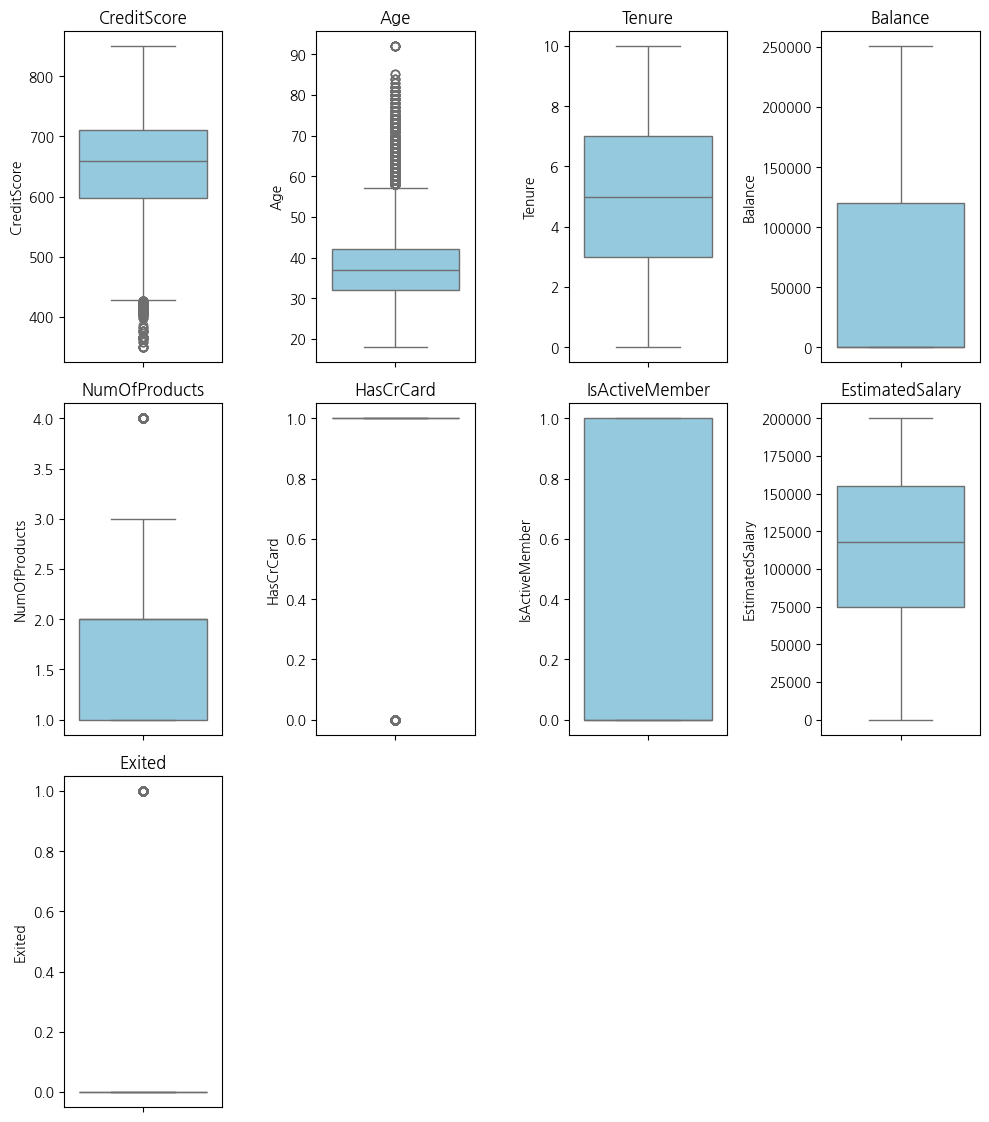

In [48]:
#3) 숫자형 데이터 이상치 확인 
#수치형만 확인
#1. drop 으로 직접 필터링
# num_df= data.drop(columns= ['id','CustomerId','Surname','Gender','Geography','HasCrCard','IsActiveMember','Exited'])

#2. _get_numeric_data 메소드 활용 =>숫자형만 출력하기 
num_df = df._get_numeric_data()

#수치형 데이터 이상치 확인 
plt.figure(figsize=(10, 15))  # 전체 플롯 크기 설정
for i, column in enumerate(num_df.columns, 1):
    plt.subplot(4, 4, i)  # 4x4 subplot 생성
    sns.boxplot(y=num_df[column], color="skyblue")
    plt.title(column, fontsize=12)
    plt.tight_layout()  # 플롯 간격 조정

plt.show()

In [49]:
#이상치 갯수 확인(iqr) : CreditScore 
q1 = df['CreditScore'].quantile(0.25)
q3 = df['CreditScore'].quantile(0.75)
iqr = q3-q1

lower_b = q1-iqr*1.5sdkl
upper_b = q3+iqr*1.5
con = (df['CreditScore'] < lower_b)|( df['CreditScore'] > upper_b)

print(lower_b,upper_b)
print('이상치 갯수 :', con.sum(),'이상치 비중 :',(con.sum()/df['CreditScore'].count()).round(3))

SyntaxError: invalid syntax (3366743202.py, line 6)

In [15]:
#이상치 갯수 확인(iqr) : age
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
iqr = q3-q1

lower_b = q1-iqr*1.5
upper_b = q3+iqr*1.5
con = (df['Age'] < lower_b)|( df['Age'] > upper_b)

print(lower_b,upper_b)
print('이상치 갯수 :', con.sum(),'이상치 비중 :',(con.sum()/df['Age'].count()).round(3))

17.0 57.0
이상치 갯수 : 6389 이상치 비중 : 0.039


In [16]:
#이상치 갯수 확인(iqr) : NumOfProducts 
q1 = df['NumOfProducts'].quantile(0.25)
q3 = df['NumOfProducts'].quantile(0.75)
iqr = q3-q1

lower_b = q1-iqr*1.5
upper_b = q3+iqr*1.5
con = (df['NumOfProducts'] < lower_b)|( df['NumOfProducts'] > upper_b)

print(lower_b,upper_b)
print('이상치 갯수/비중', con.sum(),con.sum()/df['NumOfProducts'].count()*100)

-0.5 3.5
이상치 갯수/비중 475 0.28791368650745547


# 개별 컬럼 분포 확인


In [17]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rc('font', family='NanumGothic') # For Windows
%matplotlib inline

Exited
0    78.834404
1    21.165596
Name: proportion, dtype: float64

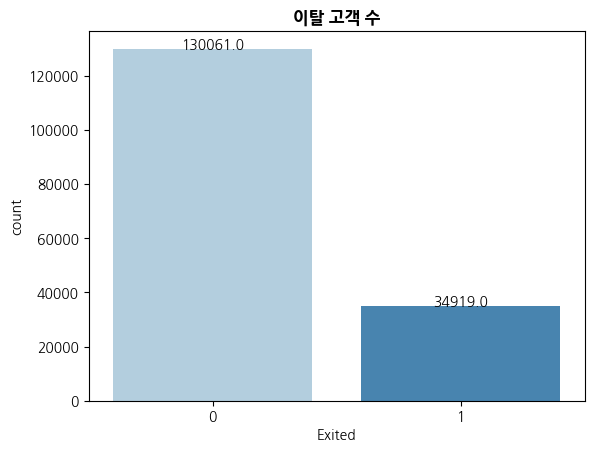

In [18]:
#범주형 카테고리별 빈도수 시각화
display(df['Exited'].value_counts(normalize=True)*100) #비중확인
x = 'Exited'

ax = sns.countplot(data=df,x=x,palette='Blues')

# 그래프 위에 Y값 레이블 추가
for p in ax.patches:
    # 막대의 중심 위치 (x)와 높이 (y)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y + 1, f'{y:.1f}', ha='center')  # y값을 텍스트로 표시

#축 범위 조정
plt.title('이탈 고객 수',fontweight='bold')
plt.show()

#범주형 분포 확인 


Geography
France     57.083889
Spain      21.943266
Germany    20.972845
Name: proportion, dtype: float64

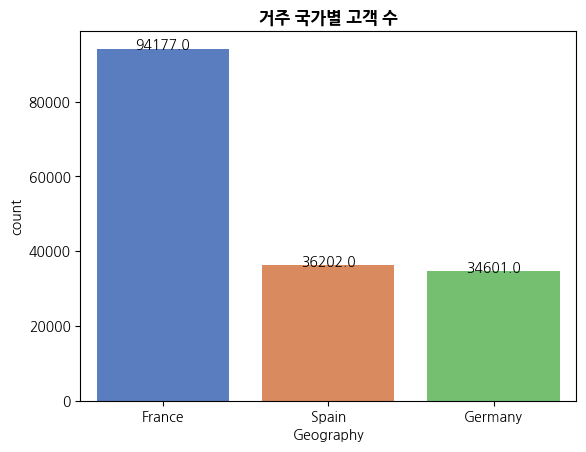

In [19]:
#범주형 카테고리별 빈도수 시각화
x = 'Geography'

display(df[x].value_counts(normalize=True)*100) #비중확인
ax = sns.countplot(data=df,x=x,palette='muted')

# 그래프 위에 Y값 레이블 추가
for p in ax.patches:
    # 막대의 중심 위치 (x)와 높이 (y)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y + 1, f'{y:.1f}', ha='center')  # y값을 텍스트로 표시

#축 범위 조정
plt.title('거주 국가별 고객 수',fontweight='bold')
plt.show()

Gender
Male      56.438356
Female    43.561644
Name: proportion, dtype: float64

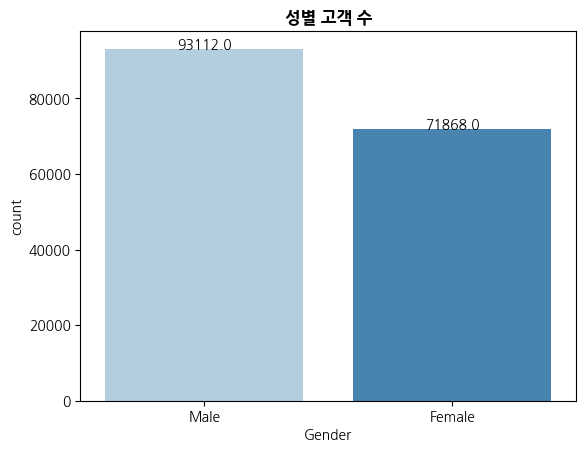

In [20]:
#범주형 카테고리별 빈도수 시각화
x = 'Gender'
display(df[x].value_counts(normalize=True)*100) #비중확인
ax = sns.countplot(data=df,x=x,palette='muted')

# 그래프 위에 Y값 레이블 추가
for p in ax.patches:
    # 막대의 중심 위치 (x)와 높이 (y)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y + 1, f'{y:.1f}', ha='center')  # y값을 텍스트로 표시

#축 범위 조정
plt.title('성별 고객 수',fontweight='bold')
plt.show()

NumOfProducts
2    51.070433
1    46.888108
3     1.753546
4     0.287914
Name: proportion, dtype: float64

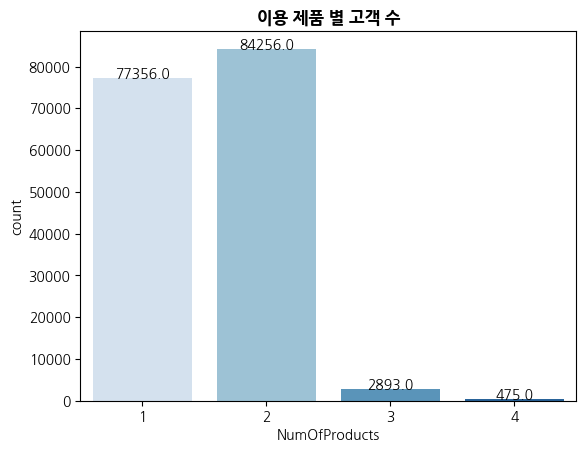

In [21]:
#범주형 카테고리별 빈도수 시각화
x = 'NumOfProducts'
display(df[x].value_counts(normalize=True)*100) #비중확인
ax = sns.countplot(data=df,x=x,palette='Blues')

# 그래프 위에 Y값 레이블 추가
for p in ax.patches:
    # 막대의 중심 위치 (x)와 높이 (y)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y + 1, f'{y:.1f}', ha='center')  # y값을 텍스트로 표시

#축 범위 조정
plt.title('이용 제품 별 고객 수',fontweight='bold')
plt.show()

HasCrCard
1.0    75.395806
0.0    24.604194
Name: proportion, dtype: float64

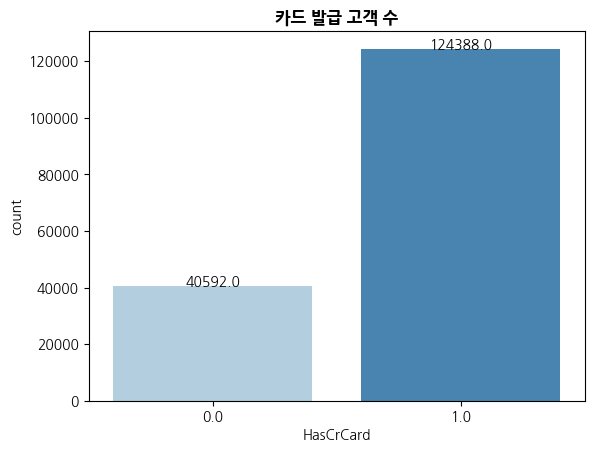

In [22]:
#범주형 카테고리별 빈도수 시각화
x = 'HasCrCard'
display(df[x].value_counts(normalize=True)*100) #비중확인
ax = sns.countplot(data=df,x=x,palette='Blues')

# 그래프 위에 Y값 레이블 추가
for p in ax.patches:
    # 막대의 중심 위치 (x)와 높이 (y)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y + 1, f'{y:.1f}', ha='center')  # y값을 텍스트로 표시

#축 범위 조정
plt.title('카드 발급 고객 수',fontweight='bold')
plt.show()

IsActiveMember
0.0    50.225482
1.0    49.774518
Name: proportion, dtype: float64

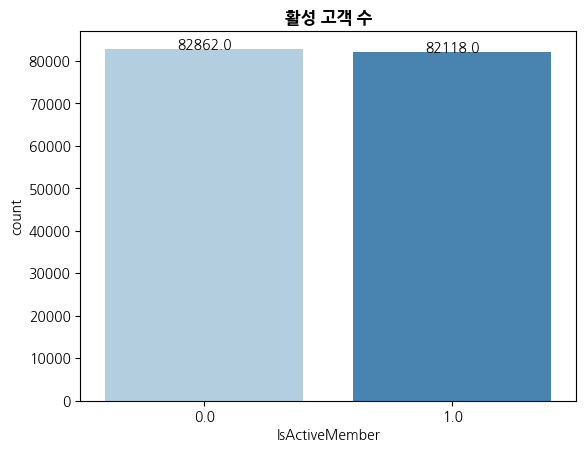

In [23]:
#범주형 카테고리별 빈도수 시각화

x = 'IsActiveMember'
display(df[x].value_counts(normalize=True)*100) #비중확인
ax = sns.countplot(data=df,x=x,palette='Blues')

# 그래프 위에 Y값 레이블 추가
for p in ax.patches:
    # 막대의 중심 위치 (x)와 높이 (y)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y + 1, f'{y:.1f}', ha='center')  # y값을 텍스트로 표시

#축 범위 조정
plt.title('활성 고객 수',fontweight='bold')
plt.show()

Tenure
2     10.928597
7     10.789793
4     10.638259
8     10.617044
5     10.462480
1     10.155776
9     10.126076
3     10.078797
6      9.587223
10     3.581040
0      3.034913
Name: proportion, dtype: float64

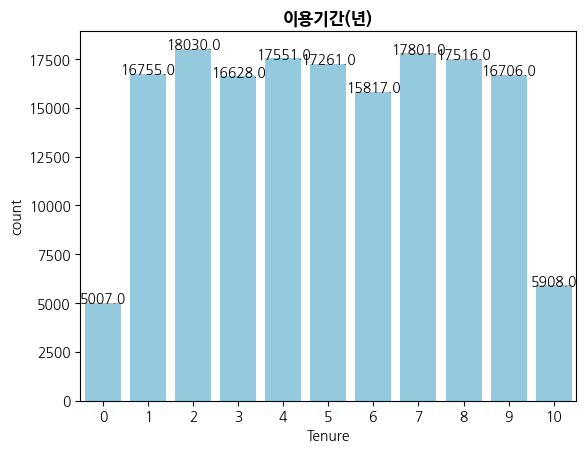

In [24]:
#범주형 카테고리별 빈도수 시각화
x = 'Tenure'
display(df[x].value_counts(normalize=True)*100) #비중확인
ax = sns.countplot(data=df,x=x,color='skyblue')

# 그래프 위에 Y값 레이블 추가
for p in ax.patches:
    # 막대의 중심 위치 (x)와 높이 (y)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y + 1, f'{y:.1f}', ha='center')  # y값을 텍스트로 표시

#축 범위 조정
plt.title('이용기간(년)',fontweight='bold')
plt.show()


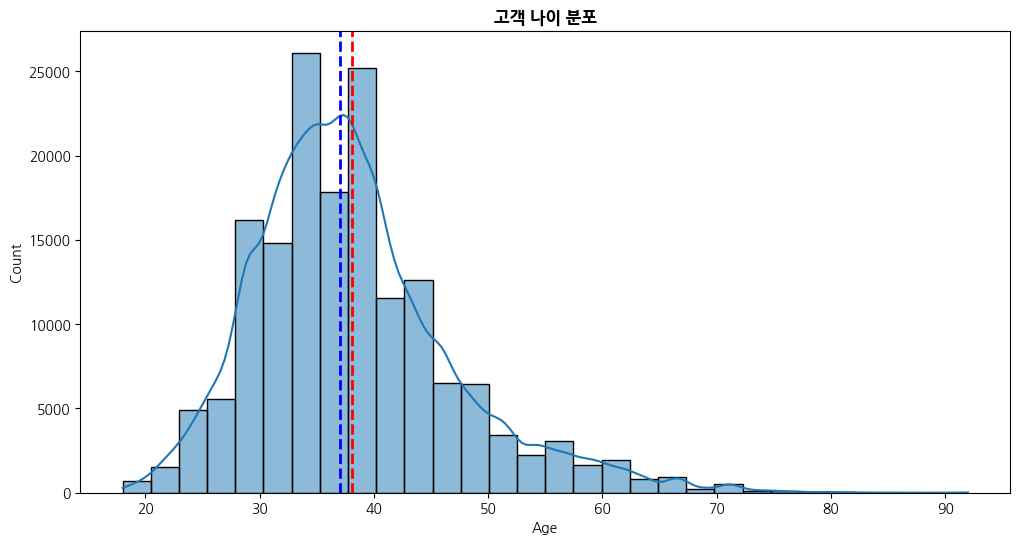

In [ ]:
#나이 분포 확인 
x2 = 'Age'

plt.figure(figsize=(12,6))
sns.histplot(data=df,x=x2,bins=30,kde=True)
plt.title('고객 나이 분포',fontweight='bold')

#평균/중앙선 시각화
mean= df[x2].mean()
median=df[x2].median()

plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
plt.axvline(median, color='blue', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')

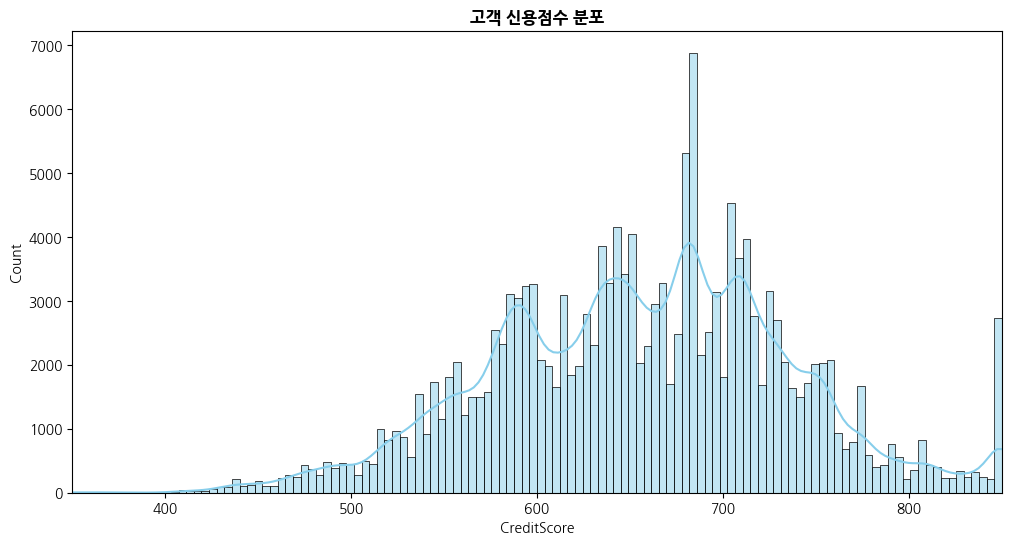

In [ ]:
#이산형 분포 확인 - 고객 분포

x1 = 'CreditScore'

plt.figure(figsize=(12,6))
sns.histplot(data=df,x=x1,color='skyblue',kde=True)
plt.title('고객 신용점수 분포',fontweight='bold')
plt.xlim(350,850)
plt.show()


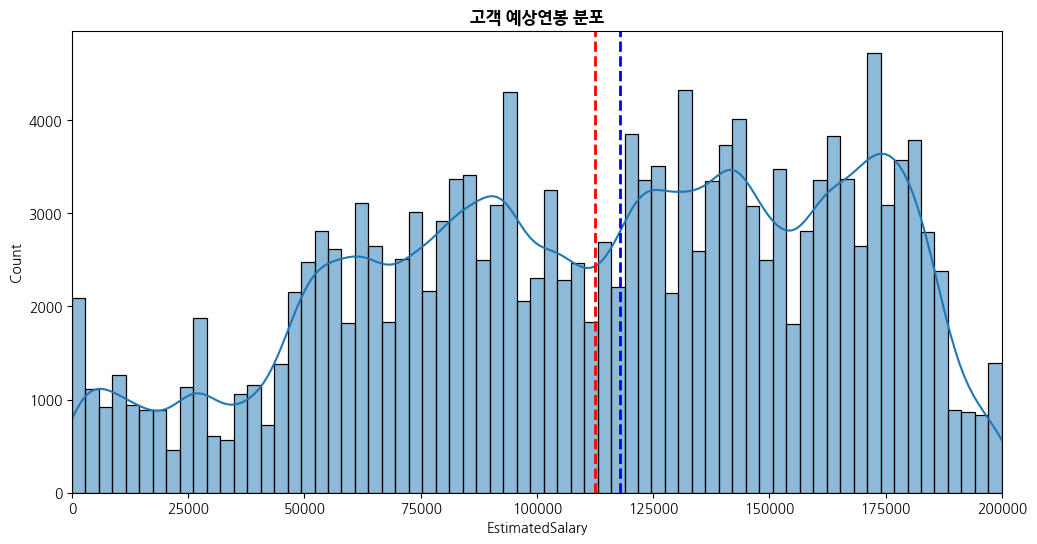

In [53]:
#나이 분포 확인 
x2 = 'EstimatedSalary'

plt.figure(figsize=(12,6))
sns.histplot(data=df,x=x2,kde=True)
plt.title('고객 예상연봉 분포',fontweight='bold')
plt.xlim(0,200000)

#평균/중앙선 시각화
mean= df[x2].mean()
median=df[x2].median()

plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
plt.axvline(median, color='blue', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')

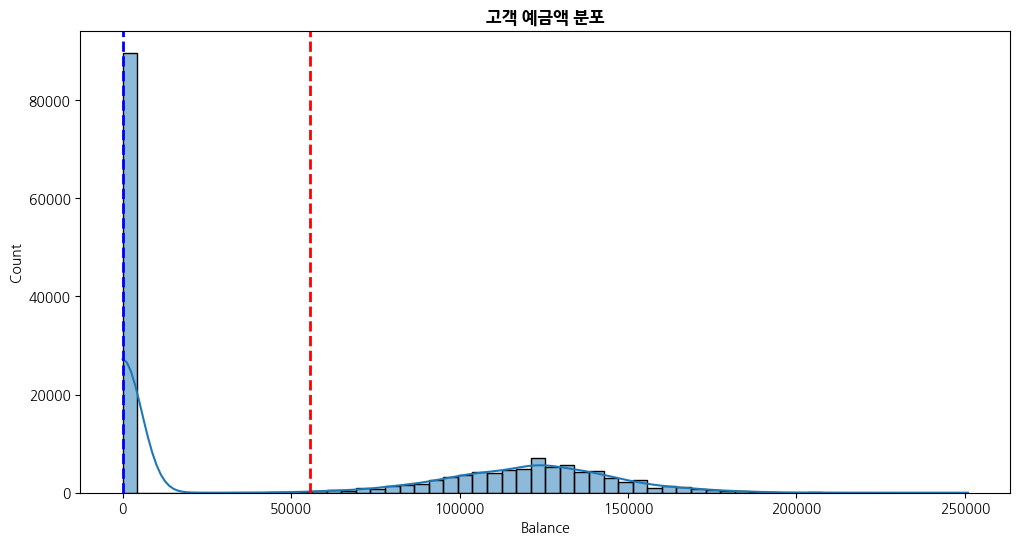

In [ ]:
#예금액은 이중 정규분포, 저예금 / 고예금 고객으로 나눠볼수있겠음
x2 = 'Balance'

plt.figure(figsize=(12,6))
sns.histplot(data=df,x=x2,kde=True)
plt.title('고객 예금액 분포',fontweight='bold')
#평균/중앙선 시각화
mean= df[x2].mean()
median=df[x2].median()

plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
plt.axvline(median, color='blue', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')

# 연봉과 예금액 분포

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


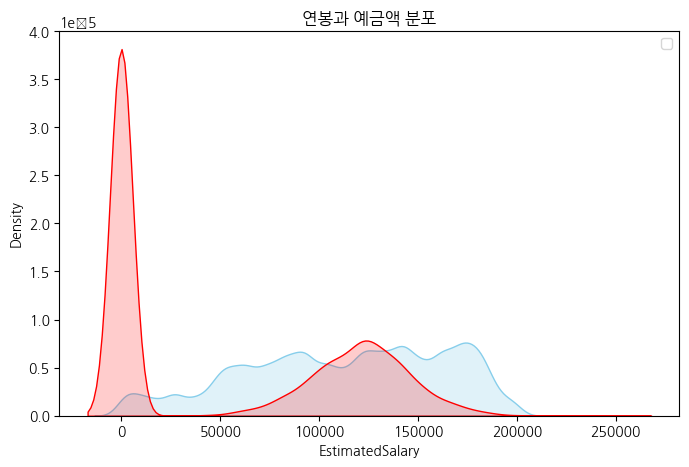

In [66]:
#확률 밀도 함수 시각화
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='EstimatedSalary', fill=True, color='skyblue')  #fill=True → 색상 채우기
sns.kdeplot(data=df, x='Balance', fill=True, color='red',alpha=0.2)  #fill=True → 색상 채우기
plt.title('연봉과 예금액 분포')
plt.legend()
plt.show()

<Axes: xlabel='EstimatedSalary', ylabel='Balance'>

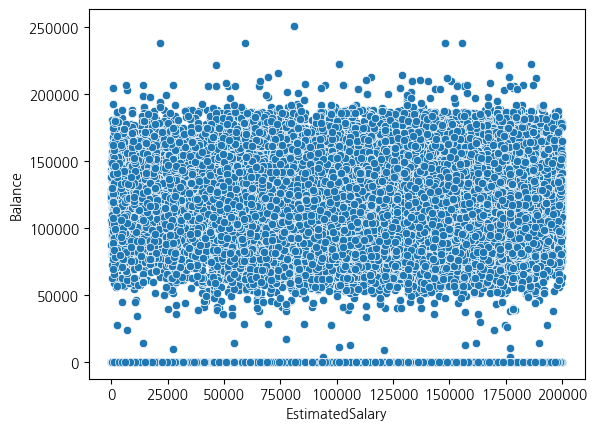

In [ ]:
#산점도 : 연봉이 높아도 예금액이 일정 수준에 머물러있는 고객층 확인해볼 필요가 있겠음. 
sns.scatterplot(data=df,x='EstimatedSalary',y='Balance')

# 상관관계 확인 - 범주형: 인코딩 진행
- gender:le
- geography : oe

In [31]:
df = df.rename(columns={'Surname' :'고객 성',
                    'CreditScore' : '신용점수',
                    'Geography' : '국가',
                    'Gender' :'성별',
                    'Age' :'나이',
                    'Tenure' : '이용기간',
                    'Balance' :'예금액',
                    'NumOfProducts' : '이용상품수',
                    'HasCrCard' : '카드발급유무',
                    'IsActiveMember':'활성여부',
                    'EstimatedSalary' :'예상연봉',
                    'Exited' : '이탈여부'
                    })

#출력
display(df.head(3))

df.shape

,고객 성,신용점수,국가,성별,나이,이용기간,예금액,이용상품수,카드발급유무,활성여부,예상연봉,이탈여부
0,Okwudilichukwu,668,France,Male,33.0,3,0.0,2,1.0,0.0,181449.97,0
1,Okwudiliolisa,627,France,Male,33.0,1,0.0,2,1.0,1.0,49503.50,0
2,Hsueh,678,France,Male,40.0,10,0.0,2,1.0,0.0,184866.69,0


(164980, 12)

In [ ]:
# 인코딩
# 레이블인코딩 - 성별(여성0, 남성1)
le = LabelEncoder()
df['성별_en'] = le.fit_transform(df['성별'])

#원핫인코딩 - 국가
oe = OneHotEncoder()
oe.fit(df[['국가']])
geo_csr = oe.transform(df[['국가']])

# CSR 데이터 데이터프레임으로 만들기
csr_df = pd.DataFrame(geo_csr.toarray(), columns = oe.get_feature_names_out())

#기존 데이터에 컬럼으로 추가하기 (axis = 1) 열 단위 
df = df.reset_index(drop=True)  # df 인덱스 초기화
csr_df = csr_df.reset_index(drop=True)  # csr_df 인덱스 초기화
csr_df = csr_df.astype(int)

df = pd.concat([df,csr_df],axis=1)
df.head(3)

#인코딩 완료 : df_en
df_en = df.drop(columns=['국가','성별'])
df_en = df_en.rename(columns={'성별_en' : '성별',
              '국가_France': '국가(프랑스)',
              '국가_Germany': '국가(독일)',
              '국가_Spain': '국가(스페인)'
              })

df_en.head(3)

,고객 성,신용점수,나이,이용기간,예금액,이용상품수,카드발급유무,활성여부,예상연봉,이탈여부,성별,국가(프랑스),국가(독일),국가(스페인)
0,Okwudilichukwu,668,33.0,3,0.0,2,1.0,0.0,181449.97,0,1,1,0,0
1,Okwudiliolisa,627,33.0,1,0.0,2,1.0,1.0,49503.50,0,1,1,0,0
2,Hsueh,678,40.0,10,0.0,2,1.0,0.0,184866.69,0,1,1,0,0


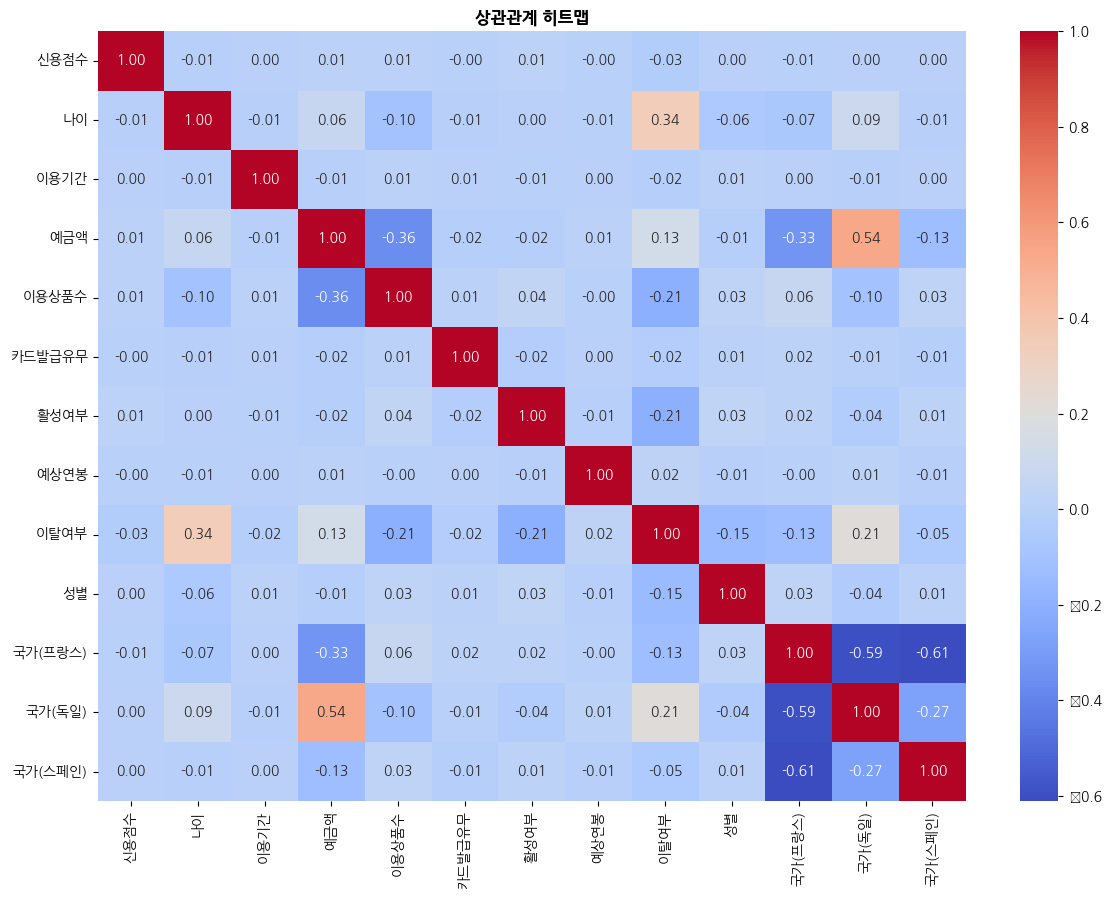

In [ ]:
df_en_corr = df_en.drop(columns= ['고객 성'])
plt.figure(figsize=(14, 10))
sns.heatmap(df_en_corr.corr(), annot=True, fmt=".2f",cmap='coolwarm')
plt.title("상관관계 히트맵",fontweight='bold',fontsize=12)
plt.show()

# 고예끔 고객(9천) 의 상관관계

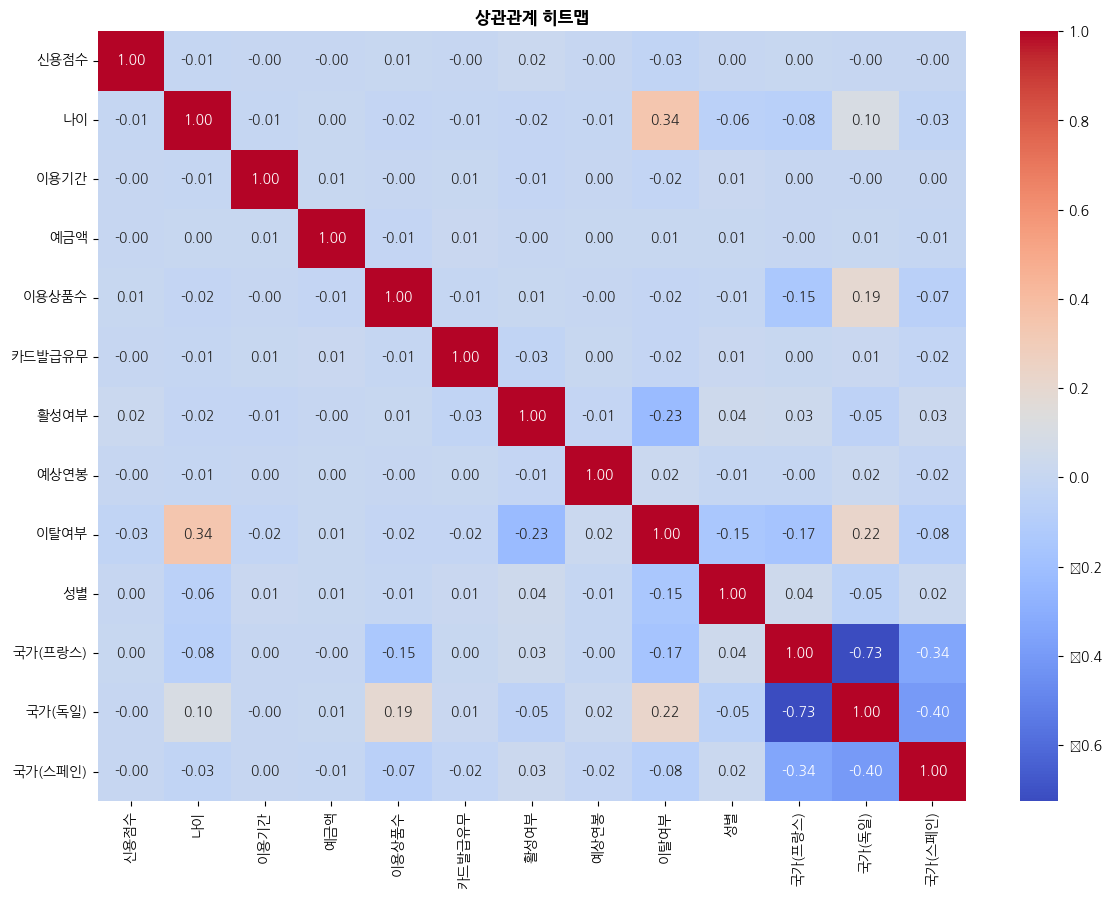

In [ ]:
#고 예금 고객의 상관관계 
df_en_d = df_en.drop(columns= ['고객 성'])
con_b = df_en_d['예금액']>9000

df_corr_high = df_en_d[con_b]

plt.figure(figsize=(14, 10))
sns.heatmap(df_corr_high.corr(), annot=True, fmt=".2f",cmap='coolwarm')
plt.title("상관관계 히트맵",fontweight='bold',fontsize=12)
plt.show()

KeyboardInterrupt: 

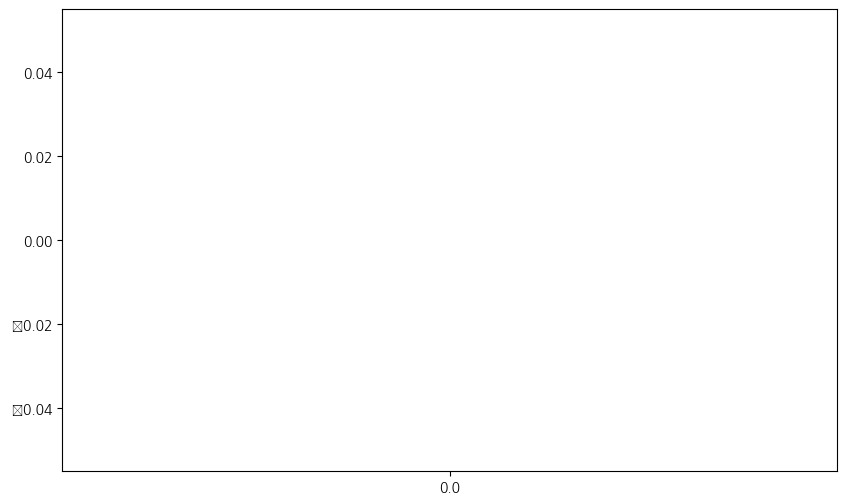

In [65]:
# Violinplot을 이용한 시각화
plt.figure(figsize=(10, 6))
sns.violinplot(y='이용상품수', x='예금액', data=df_en)
plt.title('이용상품수에 따른 예금액 분포 (Violin Plot)')
plt.show()